In [5]:
from mmd.mmd import kernelwidthPair, mmd_rbf, mmd_rbf_sigma_
from mmd.demo_utils import COLOR_MAPPING, LABEL_MAPPING, generate_rotation

import numpy as np
from sklearn.utils.validation import check_random_state

import matplotlib.pyplot as plt

seed = 0
generator = check_random_state(seed)

 # 1D example with Gaussian distributions

In [6]:
N = 100
m_0 = 10
s_0 = 1
m_1 = -m_0
s_1 = s_0
X_0 = generator.normal(loc=m_0, scale=s_0, size=(N, 1))
X_1 = generator.normal(loc=m_1, scale=s_1, size=(N, 1))

sigma = kernelwidthPair(X_0, X_1)
print("Example 1D:\n")
print(f"Bandwith given by median heuristic: {sigma}")
print(f"MMD-RBF with median heuristic: {mmd_rbf_sigma_(X_0, X_1, sigma=sigma)}")
print(f"MMD-RBF with sigma=1: {mmd_rbf_sigma_(X_0, X_1, sigma=1)}")


Example 1D:

Bandwith given by median heuristic: 14.14484142060408
MMD-RBF with median heuristic: 1.6989177884767397
MMD-RBF with sigma=1: 0.8614064796830281


 # 2D example

 Generate two populations as rotated 2D gaussians

In [7]:
N = 1000  # 10K samples -> 12s on HAS laptop
population_ratio = 0.2
overlap = 2
sigma = np.diag(np.array([2, 5]))
# angle for point rotation
theta = 0
plot = True

rotation = generate_rotation(theta=1, random_state=generator)
center = np.array([overlap, 0])
center_rotated_1 = rotation.dot(center)
center_rotated_0 = rotation.dot(-center)
sigma_rotated = rotation.dot(sigma).dot(rotation.T)
X_control = generator.multivariate_normal(
    mean=center_rotated_0,
    cov=sigma_rotated,
    size=int((1 - population_ratio) * N),
)
X_treated = generator.multivariate_normal(
    mean=center_rotated_1,
    cov=sigma_rotated,
    size=int(population_ratio * N),
)


-----
Example 2D:

Bandwith given by median heuristic: 3.5024947977316296
MMD-RBF with median heuristic: 0.5381696829496809
MMD-RBF with sigma=1: 0.13175067854987946


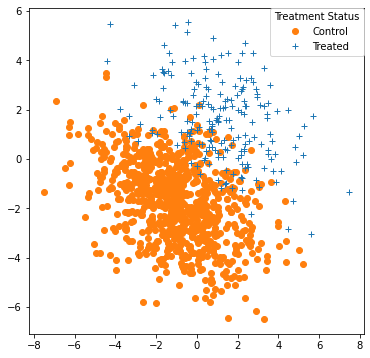

In [8]:
if plot:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    for XX, a, s, cmap in zip(
        [X_control, X_treated], [0, 1], ["o", "+"], ["Oranges", "Blues"]
    ):
        ax.plot(
            XX[:, 0],
            XX[:, 1],
            s,
            c=COLOR_MAPPING[a],
            label=LABEL_MAPPING[a],
        )
    ax.legend(
        title=r"Treatment Status",
        borderaxespad=0,
        ncol=1,
        loc="upper right",  # bbox_to_anchor=(0.9, 1.01),
    )

sigma = kernelwidthPair(X_control, X_treated)
print("-----\nExample 2D:\n")
print(f"Bandwith given by median heuristic: {sigma}")
print(
    f"MMD-RBF with median heuristic: {mmd_rbf_sigma_(X_control, X_treated, sigma=sigma)}"
)
print(f"MMD-RBF with sigma=1: {mmd_rbf_sigma_(X_control, X_treated, sigma=1)}")
